In [1]:
from sklearn import svm
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# data extraction
col_names = ['instance', 'number of movements', 'median_delay', 'average_delay', 'epochs', 'obj_val',
                               'neighborhood_size', 't0', 'alpha', 'neighbor_deviation_scale', 'affected_movements',
                               'time_interval', 'vessel_time_window']

data = pd.read_excel('results/output_2000.xlsx', names=col_names, header=0)
data = data.drop(['instance','time_interval', 'vessel_time_window'], axis=1)


In [3]:
feature_cols = ['number of movements', 'epochs','neighborhood_size', 't0', 'alpha', 'neighbor_deviation_scale','affected_movements']
X = data[feature_cols]
y = data.average_delay

C:\Users\ilias\AppData\Local\Temp\ipykernel_18680\113397303.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y, shade=True)


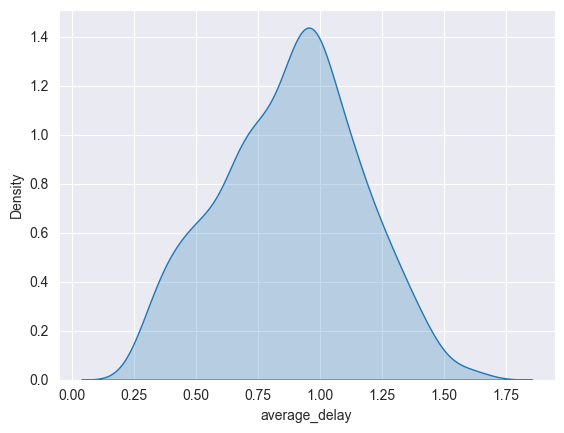

In [4]:
# split the delay into 3 classes
# make a curve to see the distribution of the delay
import matplotlib.pyplot as plt
import seaborn as sns
sns.kdeplot(y, shade=True)
plt.show()

In [5]:
# split the delay into 3 classes by quantiles
y = pd.qcut(y, 4, labels=False)

In [6]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [9]:
y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='weighted'))


Accuracy: 0.4539877300613497
Precision: 0.4559674866121754
Recall: 0.4539877300613497


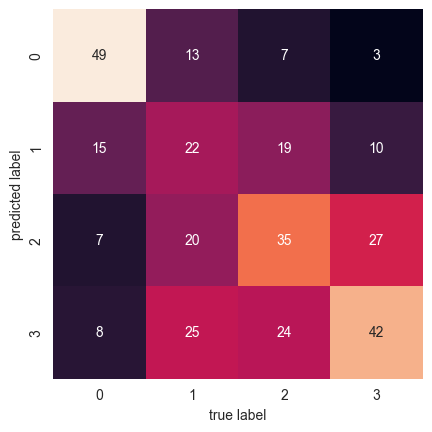

In [10]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()